In [1]:
import numpy as np
import pandas as pd

def Ackley(x1, x2):
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    return term1 + term2 + np.e + 20

def GetGrid(grid):
    x1 = np.linspace(-2, 2, grid)
    x2 = np.linspace(-2, 2, grid)
    x1, x2 = np.meshgrid(x1, x2)
    z = Ackley(x1, x2)
    return x1, x2, z

def create_dataframe(grid):
   x1, x2, z = GetGrid(grid)
   data = {'x1': x1.flatten(), 'x2': x2.flatten(), 'f(x1,x2)': z.flatten()}
   df = pd.DataFrame(data)
   return df


df_1000 = create_dataframe(32)
df_test = create_dataframe(grid=4)
df_training = create_dataframe(grid=5)

/tmp/ipykernel_1636155/1488639637.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


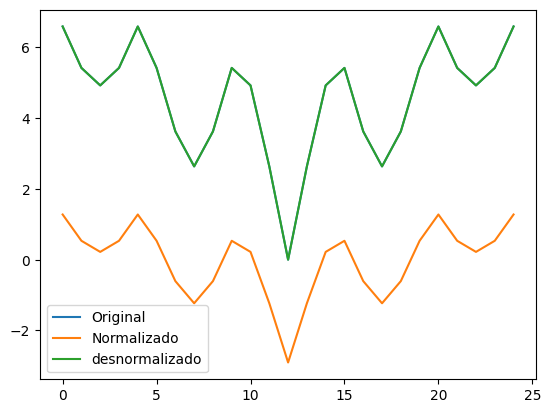

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
out_scaler = StandardScaler()

def test_out_scaler(df):
    out = df["f(x1,x2)"].values.reshape(-1, 1)  
    plt.plot(out, label='Original')
    out_scaler.fit(out)
    norm = out_scaler.transform(out)
    plt.plot(norm, label='Normalizado')
    plt.plot(out_scaler.inverse_transform(norm), label='desnormalizado')
    plt.legend()
    plt.show()

scaler.fit(np.hstack((df_training['x1'].values.reshape(-1, 1),
                       df_training['x2'].values.reshape(-1, 1))))

test_out_scaler(df_training)

In [3]:
import pandas as pd
variograms =  ["Exponential", "Gaussian", "HoleEffect", "Linear", "Original", "Power", "Spherical"]

def SumarizeForNewData():
    df = {"metric": ["r2", "mse", "mape", "rmse"]}
    for variogram in variograms:
        path = f"./{variogram}/results/results.xlsx"
        data = pd.read_excel(path, sheet_name="metrics")
        df[variogram] = data["media"]
    return pd.DataFrame(df)

def SumarizeTrainingMean():
    df = {}
    for variogram in variograms:
        path = f"./{variogram}/results/better_results.xlsx"
        data = pd.read_excel(path)
        data = data.drop(data.columns[-1], axis=1)
        mean_values = data.iloc[:, 2:].mean()
        df[variogram] = mean_values       
    return pd.DataFrame(df)

def SumarizeTraining(sort_by):
    df_dict = {}

    for variogram in variograms:
        path = f"./{variogram}/results/better_results.xlsx"
        data = pd.read_excel(path, index_col=None)
        
        data = data.sort_values(by=sort_by)
        df_dict[variogram] = data.iloc[0]
    
    df = pd.DataFrame(df_dict)
    df = df.iloc[1:]
    return df

def SumarizeForNewDataModel(models):
    df = {"metric": ["r2", "mse", "mape", "rmse"]}
    for variogram, model in zip(variograms, models):
        path = f"./{variogram}/results/results.xlsx"
        data = pd.read_excel(path, sheet_name="metrics")
        df[variogram] = data["media"]
    return pd.DataFrame(df)


# Médias das métricas de treinamento


In [5]:
display(SumarizeTrainingMean())

,Exponential,Gaussian,HoleEffect,Linear,Original,Power,Spherical
r2,8.960676e-01,9.815040e-01,9.550762e-01,6.642833e-01,9.493103e-01,6.553949e-01,7.145977e-01
r2_sup,-1.123250e-01,-2.916875e-01,-1.796619e-01,-3.815774e+00,-3.512652e-01,-1.504687e+01,-2.671844e-01
r2_test,-1.308413e+00,-2.129291e+00,-1.939844e+00,-8.161506e+00,-2.230473e+00,-2.133463e+00,-1.648662e+00
r2_val,8.519600e-01,9.772579e-01,9.388987e-01,2.117726e-01,9.146961e-01,-4.824567e-01,3.918797e-01
mse,1.416076e-01,4.489647e-02,7.509738e-02,3.206786e-01,1.258897e-01,3.291689e-01,2.819252e-01
mse_sup,2.229866e+00,2.589433e+00,2.364856e+00,9.654132e+00,2.708867e+00,3.216899e+01,2.540311e+00
mse_test,1.702254e+00,2.307580e+00,2.167879e+00,6.755813e+00,2.382193e+00,2.310656e+00,1.953158e+00
mse_val,1.962993e-01,4.665933e-02,9.031427e-02,4.773396e-01,1.346954e-01,5.994817e-01,4.254561e-01
mape,1.149666e+14,3.153434e+13,7.210281e+13,1.023184e+14,1.485732e+14,8.335676e+13,1.071042e+14
rmse,3.664880e-01,1.607448e-01,2.447128e-01,5.623769e-01,3.237935e-01,5.700876e-01,5.182499e-01


# Métricas de treinamento para o melhor modelo (ordenado por mse_sup)

In [6]:
df = SumarizeTraining(sort_by="mse_sup")
display(df)

,Exponential,Gaussian,HoleEffect,Linear,Original,Power,Spherical
model,model_2_3_2,model_4_1_7,model_2_1_3,model_2_10_5,model_1_3_1,model_3_3_0,model_1_16_5
r2,0.836662,0.821703,0.752522,0.490758,0.802722,0.507012,0.584485
r2_sup,0.212389,-0.006755,0.064642,-0.033678,0.106688,-0.323765,0.046998
r2_test,-0.810434,-1.668881,-1.409749,-0.769389,-1.158105,-1.11887,-0.869677
r2_val,0.855176,0.838278,0.853332,-7.920593,0.669494,-0.264273,0.439203
mse,0.222548,0.432791,0.413699,0.486431,0.489948,0.470905,0.410453
mse_sup,1.578915,2.018231,1.875103,2.072204,1.790813,2.653738,1.910473
mse_test,1.335037,1.968067,1.77698,1.30477,1.591415,1.562482,1.378724
mse_val,0.09457,0.467646,0.199954,0.68893,1.346343,1.155893,0.417726
mape,171685453375330.5,124557157175737.296875,198860388740427.0,155917174750475.90625,440012269829488.8125,53080901993708.40625,212646193056972.90625


# Métricas de treinamento para o melhor modelo (ordenado por mse_test)

In [7]:
df = SumarizeTraining(sort_by="mse_test")
display(df)

,Exponential,Gaussian,HoleEffect,Linear,Original,Power,Spherical
model,model_3_11_4,model_1_7_2,model_2_4_2,model_2_10_5,model_1_3_1,model_4_17_9,model_3_43_9
r2,0.924288,0.911598,0.90515,0.490758,0.802722,0.792554,0.678791
r2_sup,-0.129144,-0.053393,0.037869,-0.033678,0.106688,-0.41998,-0.504035
r2_test,-0.655249,-1.376217,-1.33517,-0.769389,-1.158105,-0.624463,-0.244434
r2_val,0.449064,0.869222,0.92521,-7.920593,0.669494,0.687782,-0.688823
mse,0.103157,0.214582,0.158557,0.486431,0.489948,0.198154,0.317295
mse_sup,2.263582,2.111727,1.928774,2.072204,1.790813,2.846619,3.015122
mse_test,1.220602,1.752253,1.721985,1.30477,1.591415,1.1979,0.917661
mse_val,0.340435,0.095408,0.060089,0.68893,1.346343,0.200161,1.274478
mape,29066352236953.640625,128382172454029.90625,130694368097831.5,155917174750475.90625,440012269829488.8125,62498889761272.1875,8781321845019.640625


In [10]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.spatial import Delaunay

def PlotSurface(X, Y, Z, model_name, mesh_x=80, mesh_y=100):
    x_sup, y_sup, z_sup = df_1000['x1'], df_1000['x2'], df_1000['f(x1,x2)']
    x_orig, y_orig, z_orig = df_training['x1'], df_training['x2'], df_training['f(x1,x2)']
    x_test, y_test, z_test = df_test['x1'], df_test['x2'], df_test['f(x1,x2)']


    points = np.column_stack((x_sup, y_sup))
    tri = Delaunay(points)

    # Criar a superfície original
    fig_surface = ff.create_trisurf(x=x_sup, y=y_sup, z=z_sup, simplices=tri.simplices, colormap='Greys')

    # Criar a superfície virtual
    virtual_surface = go.Surface(
        x=X.reshape(mesh_x, mesh_y),
        y=Y.reshape(mesh_x, mesh_y),
        z=Z,
        colorscale="matter_r",
        showscale=False,
        contours=dict(
            z=dict(
                show=True,
                start=np.min(Z),
                end=np.max(Z),
                size=0.05,
                usecolormap=True,
                project_z=True
            )
        )
    )
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=x_orig, y=y_orig, z=z_orig, mode='markers',
                               marker=dict(size=5, color='red', opacity=0.8),
                               name='Training Samples', showlegend = True))
    
    fig.add_trace(go.Scatter3d(x=x_test, y=y_test, z=z_test,
                               mode='markers',
                               marker=dict(size=5, color='blue', opacity=0.8),
                               name='Test Samples', showlegend = True))

    fig.add_trace(fig_surface.data[0])

    fig.add_trace(virtual_surface)
    fig.update_layout(
        title=f'Surface fit for {model_name} variogram',
        scene=dict(
            xaxis_title='x1',
            yaxis_title='x2',
            zaxis_title='f(x1, x2)',
            aspectmode='cube',
            xaxis = dict(backgroundcolor = "white"),
            yaxis = dict(backgroundcolor = "white"),
            zaxis = dict(backgroundcolor = "white"),
        )
    )
    py.iplot(fig)

In [11]:
import os

os.chdir("./content")

lm_dir = "tf-levenberg-marquardt"
if not os.path.exists(lm_dir):
  !git clone https://github.com/fabiodimarco/$lm_dir

os.chdir(lm_dir)

In [12]:
import tensorflow as tf
import numpy as np
from keras import regularizers
from keras import initializers
import levenberg_marquardt as lm

# layers, neurons
class ShuffleArchitecture:
    def __init__(self, input_size, hidden_sizes, output_size, act_h, act_o, param_reg):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.act_h = act_h
        self.act_o = act_o
        self.regularizer = regularizers.L2(param_reg)
        self.initializer = initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=np.random.randint(1, 10000))

    def compute_k(self):
        total_parameters = 0
        for layer in self.model.layers:
            weights = layer.get_weights()
            if len(weights) > 0:  
                for w in weights:
                    total_parameters += np.prod(w.shape)
        return total_parameters
        
    def set_architecture(self):
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(self.hidden_sizes[0],
                        input_shape=(self.input_size,),
                        activation=self.act_h,
                        kernel_regularizer=self.regularizer,
                        kernel_initializer=self.initializer,                        
                        ))  # input layer

        for size in self.hidden_sizes[1:]:  # hidden layers
            self.model.add(tf.keras.layers.Dense(size,
                            activation=self.act_h,
                            kernel_regularizer=self.regularizer,
                            kernel_initializer=self.initializer,  
                        ))

        self.model.add(tf.keras.layers.Dense(self.output_size,
                        activation=self.act_o,
                        kernel_regularizer=self.regularizer,
                        kernel_initializer=self.initializer,  
                        ))  # output layer

    def create_model(self, _learning_rate):
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
            loss=tf.keras.losses.MeanSquaredError())

        self.lm_model = lm.ModelWrapper(
            tf.keras.models.clone_model(self.model))

        self.lm_model.compile(
            optimizer=tf.keras.optimizers.SGD(learning_rate=_learning_rate),
            loss=lm.MeanSquaredError())
        return(self.lm_model)

2024-09-14 11:58:18.639249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-14 11:58:18.639319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-14 11:58:18.640882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-14 11:58:18.650639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-14 11:58:21.250346: W tensorflow/compiler/tf2

In [9]:
import pickle
import numpy as np

class Rebuild:
    def __init__(self, df):
        self.df = df 

    def LoadModelWeights(self, model, fileName):        
        file = f"{self.path}/models/{fileName}.keras"
        model.load_weights(file)

    def LoadPrevDataset(self, fileName):
        fileName = fileName.replace("model", "dataset")
        pos = fileName.rfind("_")
        file = f"{self.path}/dataset/{fileName[:pos]}.pkl" 
        with open(file, 'rb') as f:
            _data, _train, _val, _test = pickle.load(f)
        self._data, self._train, self._val, self._test = _data, _train, _val, _test    
    
    def setArchitecture(self, _hidden_sizes, _pg, _lr):
        shuffler = ShuffleArchitecture(input_size  = 2,
                                        hidden_sizes = _hidden_sizes,
                                        output_size = 1,
                                        act_h = 'tanh',
                                        act_o = 'linear',
                                        param_reg=_pg)
        shuffler.set_architecture()
        self.k = shuffler.compute_k()
        return(shuffler.create_model(_lr))            

    def getArchitecture(self, architecture):
        hidden_size = [int(x) for x in architecture.split("[")[1].split("]")[0].split(", ")]
        regularizer = float(architecture.split("regularizer=")[1].split(",")[0])
        learning_rate = float(architecture.split("learning_rate=")[1])
        return hidden_size, regularizer, learning_rate   
    
    def predictUnsampled(self, model, mesh_x=80, mesh_y=100):
        Z = np.zeros((mesh_x, mesh_y))
        dx, dy = 1 / mesh_y, 1 / mesh_x

        X = np.zeros(mesh_x * mesh_y)
        Y = np.zeros(mesh_x * mesh_y)
        
        points = np.zeros((mesh_x * mesh_y, 2))
        
        for i in range(mesh_x):
            for j in range(mesh_y):
                idx = i * mesh_y + j
                X[idx] = dx * j
                Y[idx] = dy * i
                points[idx] = [X[idx], Y[idx]]

        points = scaler.transform(points)
        Z_flat = model.predict(points)
        Z_flat = out_scaler.inverse_transform(Z_flat)

        Z = Z_flat.reshape((mesh_x, mesh_y))

        return X, Y, Z

    def rebuildFullNet(self):
        for file_model, architecture, variogram in zip(self.df["model"], self.df["Architecture"], df.index):
            print(file_model, architecture, variogram)
            self.path = f'../../{variogram}/content'
            hidden_size, regularizer, learning_rate = self.getArchitecture(architecture)
            self.lm_model = self.setArchitecture(hidden_size, regularizer, learning_rate)
            self.LoadModelWeights(self.lm_model, file_model)
            self.LoadPrevDataset(file_model)
            X, Y, Z = self.predictUnsampled(self.lm_model)
            PlotSurface(X, Y, Z, variogram)

In [ ]:
Rebuilder = Rebuild(df)
Rebuilder.rebuildFullNet()